# Text Visualization with Word Clouds: Atatürk's "Speech" 

# Project Overview: Word Cloud Visualization of Atatürk's "Nutuk" (Speech)

In this project, I have created a word cloud from **Mustafa Kemal Atatürk's iconic work, "Nutuk" (Speech)**, which is a detailed historical account of the Turkish War of Independence and the early years of the Turkish Republic. The original text of the book is in **Turkish**, and this study focuses on analyzing the word frequency in the Turkish language.

To add a visual element that aligns with the historical and cultural significance of the book, I used a **map of Turkey as the background mask** for the word cloud. This choice highlights the importance of the geographical and national context of Atatürk's speeches.

The word cloud itself represents the **most frequently used words and phrases** in the book, giving us insights into the key themes and ideas emphasized throughout the text. Words are sized according to their frequency, allowing the most common words to stand out visually.

## Why This Study is Important:

- **Text Visualization**: Word clouds provide a quick, visual summary of the most common terms in a text, which is especially useful when analyzing large works like "Nutuk." It helps us grasp the recurring themes and significant terms in Atatürk's speech.
  
- **Historical Context**: "Nutuk" holds immense historical value, as it captures the essence of Turkey’s transformation from a struggling nation to a republic under Atatürk's leadership. By visualizing this text, we can see the words and phrases that mattered most during this period.

- **Language and Word Frequency Analysis**: This study also offers a linguistic exploration by identifying key word patterns in Turkish, helping us understand which terms were most frequently used in political and nationalistic discourse at that time.

In the following sections, you’ll find a detailed explanation of the methods used to preprocess the text, generate the word cloud, and create a visually appealing representation using Python’s `wordcloud` library. Additionally, I'll explain how I customized the word cloud by selecting the appropriate **stopwords** (common words like "and" or "the" that were filtered out) and choosing a **map of Turkey** as a mask to reflect the national significance of the speech.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%time

import pdfplumber

# Initialize an empty string to hold the entire text of the PDF
pdf_text = ""

# Open the PDF file
with pdfplumber.open('nutuk.pdf') as pdf:
    # Iterate over all the pages in the PDF
    for page in pdf.pages:
        # Extract text from the current page
        page_text = page.extract_text()
        
        # Append the text of the current page to the pdf_text variable
        pdf_text += page_text + "\n"  # Adding a newline between pages (optional)

CPU times: user 43.3 s, sys: 570 ms, total: 43.8 s
Wall time: 44 s


In [3]:
def turkish_lower(text):
    # Create a translation table for Turkish characters
    translation_table = str.maketrans({
        'İ': 'i',
        'Ş': 'ş',
        'Ğ': 'ğ',
        'Ü': 'ü',
        'Ç': 'ç',
        'Ö': 'ö',
        'I': 'ı'  # Note that in Turkish, capital 'I' becomes 'ı' (dotless i)
    })
    
    # Use the translation table to replace characters
    return text.translate(translation_table).lower()

# Example: Apply the function to the pdf_text
pdf_text = turkish_lower(pdf_text)


In [4]:
len(pdf_text)

1482845

In [5]:
#import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud imported!')

Wordcloud imported!


In [6]:
# Open and read the file
with open('turkce-stop-words.txt', 'r', encoding='utf-8') as file:
    # Read the entire content of the file
    text = file.read()

    # Split the text into words and remove newlines
    turkish_stopwords = [word.strip() for word in text.split()]

Wordcloud imported!


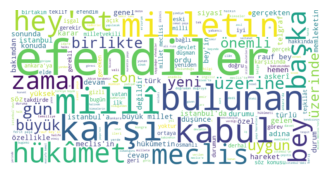

In [7]:
#import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud imported!')
# Open and read the file
with open('turkce-stop-words.txt', 'r', encoding='utf-8') as file:
    # Read the entire content of the file
    text = file.read()

    # Split the text into words and remove newlines
    turkish_stopwords = [word.strip() for word in text.split()]

stopwords = set(STOPWORDS)
stopwords.update(turkish_stopwords)
nutuk_wc = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white')
nutuk_wc.generate(pdf_text.lower())
fig = plt.figure(figsize=(4, 6))
plt.imshow(nutuk_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcloud imported!


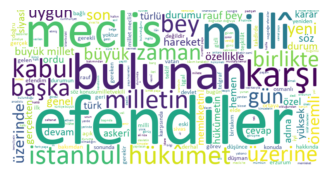

In [8]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

font_path = 'calibri.ttf'

# Print a confirmation that WordCloud has been imported
print('Wordcloud imported!')

# Step 1: Read Turkish stopwords from a file
with open('turkce-stop-words.txt', 'r', encoding='utf-8') as file:
    turkish_stopwords = [word.strip() for word in file.read().splitlines()]

# Step 2: Combine default English stopwords and custom Turkish stopwords
stopwords = set(STOPWORDS)
stopwords.update(turkish_stopwords)

# Step 3: Preprocess the text to remove possessive suffixes like "'nın", "'nin", etc.
def remove_possessive_suffixes(text):
    # Regular expression to remove common possessive suffixes in Turkish
    # This pattern removes suffixes like "'nın", "'nin", "'nı", "'nu", etc.
    return re.sub(r"\'[daıiuneaya]", '', text)

# Step 4: Open and preprocess your PDF text (already extracted into pdf_text)
pdf_text_cleaned = remove_possessive_suffixes(pdf_text.lower())

# Step 5: Generate the word cloud and pass the stopwords set
nutuk_wc = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white', font_path=font_path)

# Generate the word cloud using the cleaned text
nutuk_wc.generate(pdf_text_cleaned)

# Step 6: Plot the word cloud
fig = plt.figure(figsize=(4, 6))
plt.imshow(nutuk_wc, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [9]:
from PIL import Image

In [10]:
ata_mask = np.array(Image.open(('turkiye.png')))

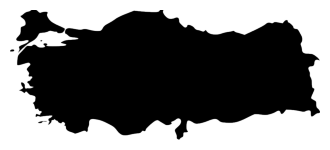

In [11]:
fig = plt.figure(figsize=(4, 6))

plt.imshow(ata_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

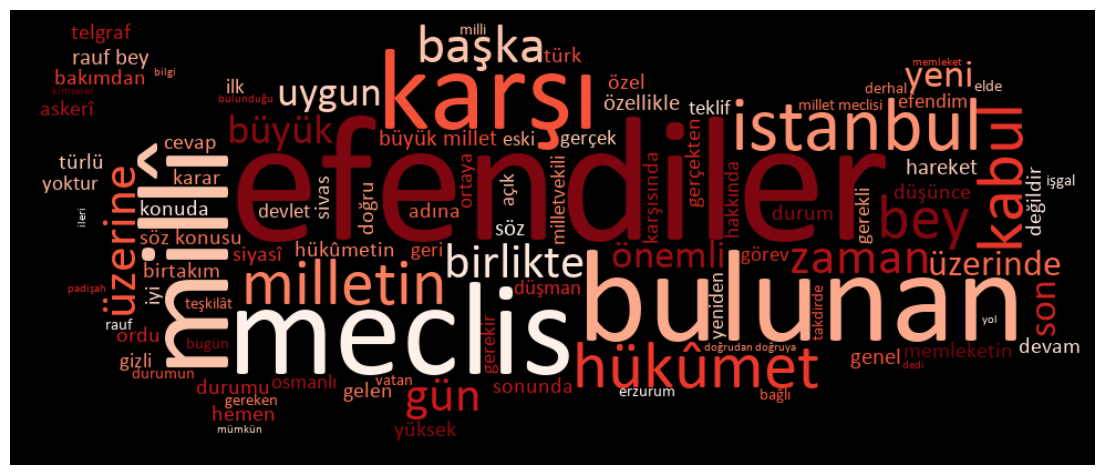

In [12]:
# Step 5: Generate the word cloud and pass the stopwords set
nutuk_wc = WordCloud(stopwords=stopwords, max_words=100,  
                     width=800, height=400, background_color='black', 
                     mask=ata_mask, font_path=font_path, colormap='Reds')

# Generate the word cloud using the cleaned text
nutuk_wc.generate(pdf_text_cleaned)

# Step 6: Plot the word cloud
fig = plt.figure(figsize=(14, 18))
plt.imshow(nutuk_wc, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()